In [1]:
#1) Load in the appropriate csv file as a pandas dataframe (batting.csv)
#2) Print out the dimensions and info about the dataframe you just created
import numpy as np
import pandas as pd

df = pd.read_csv('Batting.csv')

# Any NA, NaN or infitity, coerce them to zero.
df.fillna(value = 0, inplace= True)

# variable definitions
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SH'])
df['PA'] = (df['AB'] + df['BB'] + df['HBP'] + df['SH'] + df['SF'])
df['BA'] = (df['H'] / df['AB'] )
df['seasonage'] = df['yearID'] - df['birthYear']

df.shape

(102816, 29)

In [2]:
print(df.columns)
print(df.describe(include=['O']))

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'PA', 'BA',
       'seasonage'],
      dtype='object')
         playerID nameFirst nameLast  teamID    lgID
count      102816    102816   102816  102816  102816
unique      18915      2333     9751     149       7
top     mcguide01      Mike    Smith     CHN      NL
freq           31      2570      754    4863   52134


In [3]:
#3)	How many players have hit 40 or more HRs in one single season? (Number only)

df_3 = df.groupby(['yearID','playerID', 'nameFirst', 'nameLast']).sum()
df_3[df_3['HR'] >= 40]['HR'].count()

330

In [4]:
#4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRS) 

df_4 = df.groupby(['playerID', 'nameFirst', 'nameLast']).sum()
df_4[df_4['HR'] >= 600]['HR'].reset_index().drop(columns='playerID')

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


In [5]:
#5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only, unique) – inclusive 40 or more.

df_3[ (df_3['2B'] >= 40) & (df_3['3B'] >= 10) & (df_3['H'] >= 200) & (df_3['HR'] >= 30) ]['birthYear'].count()

16

In [6]:
#6)	How many players seasons have had 100 or more SBs in a season? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending ) 

df_3[ df_3['SB']>= 100]['SB'].sort_values(ascending=False).reset_index().drop(columns='playerID')

,yearID,nameFirst,nameLast,SB
0,1887,Hugh,Nicol,138.0
1,1982,Rickey,Henderson,130.0
2,1887,Arlie,Latham,129.0
3,1974,Lou,Brock,118.0
4,1887,Charlie,Comiskey,117.0
5,1891,Billy,Hamilton,111.0
6,1889,Billy,Hamilton,111.0
7,1887,John,Ward,111.0
8,1985,Vince,Coleman,110.0
9,1987,Vince,Coleman,109.0


In [7]:
#7)	How many players in the 1960s(yearID) have hit more than 200 HRs? (Dataframe, firstname, lastname, number of HRs, ordered descending by HR amount)

df_7 = df[(df['yearID'] >= 1960) & (df['yearID'] <= 1969)].groupby(['playerID', 'nameFirst', 'nameLast']).sum()
df_7[df_7['HR'] >=200].sort_values(by='HR', ascending=False).reset_index()[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [8]:
#8)	Who has hit the most HRs in history? (Dataframe, firstname, lastname, HRs)

df_8 = df_4.sort_values(by='HR', ascending = False)
#df_8.iloc[0:1].reset_index()[['nameFirst','nameLast','HR']]
df_8['HR'].head(1).reset_index()[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Barry,Bonds,762


In [9]:
#9)	Who had the most hits(H) in the 1970s? (Dataframe)

df_9 = df_4[(df_4['yearID'] >= 1970) & (df_4['yearID'] <= 1979)].sort_values(by = 'H', ascending = False)
df_9.head(3)

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA,seasonage
playerID,nameFirst,nameLast,,,,,,,,,,,,,,,,,,,,,
thompbo01,Bobby,Thompson,1953,1978,1,64,120,23,27,3,3,2,...,26.0,1.0,2.0,2.0,3.0,0.0,0.285714,136.0,0.225000,25
mallosh01,Sheldon,Mallory,1953,1977,1,64,126,19,27,4,1,0,...,18.0,0.0,3.0,2.0,1.0,2.0,0.288732,143.0,0.214286,24
sandere01,Reggie,Sanders,1949,1974,1,26,99,12,27,7,0,3,...,20.0,2.0,0.0,1.0,0.0,2.0,0.304762,105.0,0.272727,25


In [10]:
# 10)Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977? (Dataframe, firstname, lastname, OBP, ordered descending by OBP) . 

df_10 = df[df['yearID']==1977].groupby(['playerID','nameFirst','nameLast']).sum()
df_10['OBP'] = (df_10['H'] + df_10['BB'] + df_10['HBP']) / (df_10['AB'] + df_10['BB'] + df_10['HBP'] + df_10['SH'])
df_10[df_10['PA'] >= 500].sort_values(by='OBP', ascending = False).reset_index()[['nameFirst','nameLast','OBP']].head(5)

,nameFirst,nameLast,OBP
0,Rod,Carew,0.451379
1,Ken,Singleton,0.441860
2,Reggie,Smith,0.431208
3,Joe,Morgan,0.420312
4,Mike,Hargrove,0.419003


In [11]:
#11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, firstname, lastname, average, descending by average)
# https://www.baseball-reference.com/bullpen/batting_average 
# bu soruda average'lar topluyorum ya, bu bir problem olusturmamiz mi?

df_11 = df[df['yearID']==2013].groupby(['playerID','nameFirst','nameLast']).sum()
df_11['BA'] = df_11['H'] / df_11['AB'] 
df_11[df_11['PA'] >=300].sort_values(by='BA', ascending = False).reset_index()[['nameFirst','nameLast','BA']].head(8)

,nameFirst,nameLast,BA
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


In [12]:
# 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, firstname, lastname, numberof hits) - 
#top 5 players in this time frame

df_12 = df[(df['yearID'] >= 1940) & (df['yearID'] <= 1949)].groupby(['playerID','nameFirst','nameLast']).sum()
df_12.sort_values('H', ascending = False).reset_index()[['nameFirst','nameLast','H']].head(5)

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


In [13]:
#13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

df_13 = df_3['H'].reset_index().groupby('yearID').max()
df_13.drop(columns='playerID')

,nameFirst,nameLast,H
yearID,,,
1871,William,Zettlein,66
1872,William,Zettlein,99
1873,Wes,Zettlein,137
1874,Z. H.,Zettlein,123
1875,William,Zettlein,143
1876,William,Zettlein,138
1877,Will,York,103
1878,Will,York,100
1879,Will,York,146


In [14]:
#14)	 Which players have played the most games for their careers?  Top 5 firstname lastname, descending by games played presented as a dataframe

df_4.sort_values('G', ascending=False).reset_index()[['nameFirst','nameLast','G']].head(5)

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


In [15]:
#15)	How many players have had more than 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

df_4[ (df_4['H'] >= 3000) & (df_4['HR'] >= 500) ]['H'].count()

5

In [16]:
# 16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

df[df['yearID'] == 1988]['HR'].sum()

3180

In [17]:
# 17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had 
#at least 500 or more Abs. dataframe, firstname, lastname, average, descending by average.

df[ (df['nameFirst']=='Wade') & (df['nameLast']=='Boggs') ].sort_values('BA', ascending=False).head(3)[['nameFirst','nameLast','BA']]

,nameFirst,nameLast,BA
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


In [18]:
# 18)	 Please filter out the top OBPs for the 1995 season with at least 400 or more PAs, sorted by OBP.  Dataframe, firstname, lastname, OBP
# bu soruda average'lar topluyorum ya, bu bir problem olusturmamiz mi? 11.soruda da ayni problem var. 


df_18 = df[ (df['yearID']==1995)].groupby(['playerID','nameFirst','nameLast']).sum()
df_18['OBP'] = (df_18['H'] + df_18['BB'] + df_18['HBP']) / (df_18['AB'] + df_18['BB'] + df_18['HBP'] + df_18['SH'])
df_18[ df_18['PA'] >= 400].sort_values('OBP', ascending = False).reset_index()[['nameFirst', 'nameLast', 'OBP']].head(10)

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.481890
1,Frank,Thomas,0.462992
2,Mark,McGwire,0.447115
3,Jim,Thome,0.440433
4,Chili,Davis,0.436647
5,Barry,Bonds,0.434231
6,Tim,Salmon,0.432177
7,Dave,Magadan,0.428571
8,Chuck,Knoblauch,0.426518
9,Wade,Boggs,0.417603


In [19]:
# 19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  Dataframe, firstname, lastname, number of 3B
#it should be only one person or two people in case of tie

df_19 = df[ (df['yearID']==1922) | (df['yearID']==1925) | (df['yearID']==1926) | (df['yearID']==1928) ].groupby(['playerID','nameFirst','nameLast']).sum()
df_19.sort_values('3B', ascending = False)['3B'].reset_index().drop('playerID', axis = 1).head(1)

,nameFirst,nameLast,3B
0,Curt,Walker,59


In [20]:
# 20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

df_20 = df_3[ (df_3['HR']>=30) & (df_3['SB']>=30)].reset_index()['playerID']
len(set(df_20))

38

In [21]:
# 21)	 Who had the highest OBP is 1986 with at least 400 or more ABs? (Dataframe, firstname, lastname, OBP)

df_21 = df[df['yearID']==1986].groupby(['playerID','nameFirst','nameLast']).sum()
df_21['OBP'] = (df_21['H'] + df_21['BB'] + df_21['HBP']) / (df_21['AB'] + df_21['BB'] + df_21['HBP'] + df_21['SH']) 
df_21[ df_21['AB']>=400 ].sort_values('OBP', ascending = False).reset_index()[['nameFirst', 'nameLast', 'OBP']].head(1)

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.45283


In [22]:
# 22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, firstname, lastname, OBP)

df[ (df['yearID']==1997) & (df['AB']>=400) & (df['lgID'] =='NL') ].sort_values('OBP', ascending = False)[['nameFirst', 'nameLast', 'OBP']].head(1)

df_22 = df[ (df['yearID']==1997) & (df['lgID'] =='NL') ].groupby(['playerID','nameFirst','nameLast']).sum()
df_22['OBP'] = (df_22['H'] + df_22['BB'] + df_22['HBP']) / (df_22['AB'] + df_22['BB'] + df_22['HBP'] + df_22['SH']) 
df_22[ df_22['AB']>=400 ].sort_values('OBP', ascending = False).reset_index()[['nameFirst', 'nameLast', 'OBP']].head(1)

,nameFirst,nameLast,OBP
0,Larry,Walker,0.454545


In [23]:
# 23)	Who had more than the league average HRs in 2012 (filter out all players with 500 or more ABs)? (Dataframe, firstname, lastname, HR descending)

ave12 = df[df['yearID']==2012]['HR'].mean()
df_23 = df[ (df['yearID']==2012) & (df['HR'] > ave12) ].groupby(['playerID','nameFirst', 'nameLast']).sum()
df_23[df_23['AB']>=500].sort_values('HR', ascending = False).reset_index()[['nameFirst', 'nameLast', 'HR']]
#[['nameFirst', 'nameLast', 'HR']].sort_values('nameLast')

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Curtis,Granderson,43
2,Josh,Hamilton,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Chris,Davis,33


In [25]:
# 24)	 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, firstname, lastname, HRs)
# age'i kontrol et. sum ettigi icin problem olabilir. 
df_24 = df_3.reset_index()
df_24['seasonage'] = (df_24['yearID'] - df_24['birthYear'])
df_24[df_24['HR'] >= 50].sort_values('seasonage').reset_index()[['nameFirst', 'nameLast', 'HR', 'seasonage']].head(2)

,nameFirst,nameLast,HR,seasonage
0,Mark,McGwire,58,-1929
1,Prince,Fielder,50,23


In [135]:
# 25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, firstname, lastname, season they eclipsed more than 300 HRs)
# age'i kontrol et. sum ettigi icin problem olabilir. 

df_4[df_4['HR'] >= 300].sort_values('HR', ascending = False).head(5)

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA,seasonage
playerID,nameFirst,nameLast,,,,,,,,,,,,,,,,,,,,,
bondsba01,Barry,Bonds,43208,43923,22,2986,9847,2227,2935,601,77,762,...,1539.0,688.0,106.0,4.0,91.0,165.0,9.784094,12606.0,6.562727,715
aaronha01,Hank,Aaron,44482,45195,23,3298,12364,2174,3771,624,98,755,...,1383.0,293.0,32.0,21.0,121.0,328.0,8.613187,13940.0,6.924731,713
ruthba01,Babe,Ruth,41690,42339,22,2503,8398,2174,2873,506,136,714,...,1330.0,0.0,43.0,113.0,0.0,2.0,9.588063,10616.0,7.100518,649
rodrial01,Alex,Rodriguez,43450,44101,22,2784,10566,2021,3115,548,31,696,...,2287.0,97.0,176.0,16.0,111.0,261.0,8.063211,12207.0,6.232222,651
mayswi01,Willie,Mays,44413,45145,24,2992,10881,2062,3283,523,140,660,...,1526.0,192.0,44.0,13.0,91.0,251.0,8.777433,12493.0,6.667193,732


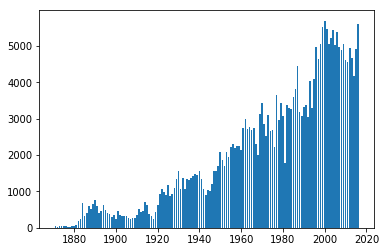

In [123]:
# Bonus1: Graph total HRs per season using bar graph

import matplotlib.pyplot as plt
df_b1 = df.groupby('yearID').sum()['HR'].reset_index()
plt.bar(df_b1['yearID'],df_b1['HR'])
plt.show()
plt.show()

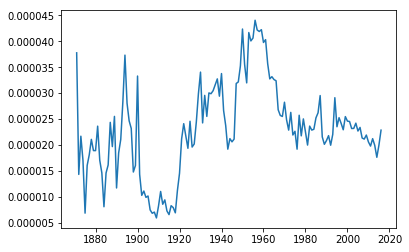

In [124]:
# Bonus2: Using a line graph please graph the average HRs per AB (think about this) per season
df_b2 = df.groupby('yearID').mean()['HR'].reset_index()
df_b2e = df.groupby('yearID').sum()['AB'].reset_index()
plt.plot(df_b2['yearID'], df_b2['HR']/df_b2e['AB'])
plt.show()

In [ ]:
Grading: Each task will be worth 3.5 pts (there will be 25 total).  
Naming convention and github link will be worth 6.25 pts apiece.  
I will include the two bonus questions which will be worth 1 pt apiece (they will be simple viz questions)
panavur_batuhan_assignment2

